# Image matching using Old school techniques(Brief,Orb,Censure,Ransac) and evaluate their accuracy

In [ ]:
# Take images from dataset and try to match images using traditional local features. (ORB and CENSURE)

In [1]:
import numpy as np
from skimage import io
from skimage import data_dir
import matplotlib.pyplot as plt
from skimage.io import imshow

In [8]:
#match image using BRIEF

In [28]:
from skimage import data
from skimage import io
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, BRIEF, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [29]:
import skimage.io, skimage
img_sim1=skimage.io.imread('/home/diganta/Downloads/21-40/33/Sim1.jpg',as_grey = True)
img_sim2=skimage.io.imread('/home/diganta/Downloads/21-40/33/Sim2.jpg',as_grey = True) #Test Image
img_diff=skimage.io.imread('/home/diganta/Downloads/21-40/33/Diff.jpg',as_grey = True)

In [30]:
# Create Sim2 image by adding Scale Invariance
#tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
#img2_gray= tf.warp(img2_gray, tform)

In [31]:
keypoints1 = corner_peaks(corner_harris(img_sim1), min_distance=5)
keypoints2 = corner_peaks(corner_harris(img_sim2), min_distance=5)
keypoints3 = corner_peaks(corner_harris(img_diff), min_distance=5)

In [32]:
keypoints1.shape

(78, 2)

In [33]:
print(len(keypoints1))
print(len(keypoints2))
print(len(keypoints3))

78
87
93


In [49]:
total_keypoints12=len(keypoints1)+len(keypoints2)
total_keypoints12


152

In [48]:
total_keypoints23=len(keypoints2)+len(keypoints3)
total_keypoints23

161

In [51]:
print("total matches between sim1 and sim2 image is=",total_keypoints12)
print("total matches between sim1 and diff image is=",total_keypoints23)

total matches between sim1 and sim2 image is= 152
total matches between sim1 and diff image is= 161


In [34]:
extractor = BRIEF()

In [35]:
extractor.extract(img_sim1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors

extractor.extract(img_sim2,keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors

extractor.extract(img_diff, keypoints3)
keypoints3 = keypoints3[extractor.mask]
descriptors3 = extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches23 = match_descriptors(descriptors2, descriptors3, cross_check=True)



In [36]:
print(len(descriptors1))
print(len(descriptors2))

70
82


In [37]:
len(matches12)

37

In [38]:
len(matches23)

22

# accuracy between sim1 and sim2 image

In [46]:
accuracy=len(matches12)/total_keypoints12
accuracy

0.24342105263157895

# accuracy between sim1 and diff image

In [53]:
accuracy=len(matches23)/total_keypoints23
accuracy

0.13664596273291926

In [ ]:
#plot matches12 and matches23 

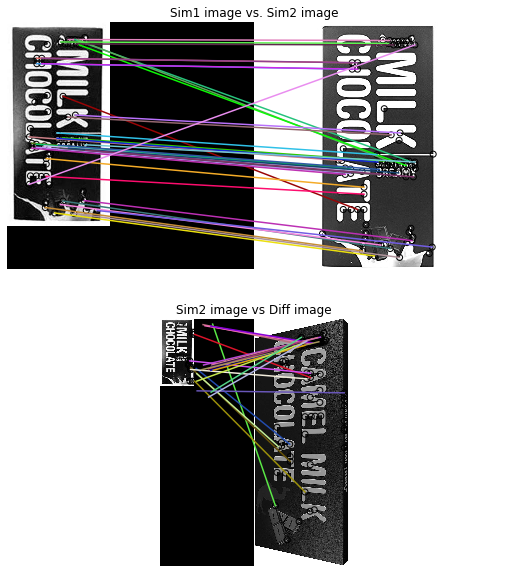

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,10))
plt.gray()

plot_matches(ax[0], img_sim1, img_sim2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Sim1 image vs. Sim2 image")

plot_matches(ax[1], img_sim1,img_diff,keypoints2,keypoints3,matches23)
ax[1].axis('off')
ax[1].set_title("Sim2 image vs Diff image")
plt.show()


In [56]:
#matchimage using orb

In [62]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt



In [63]:
import skimage.io, skimage
img_sim1=skimage.io.imread('/home/diganta/Downloads/21-40/33/Sim1.jpg',as_grey = True)
img_sim2=skimage.io.imread('/home/diganta/Downloads/21-40/33/Sim2.jpg',as_grey = True) #Test Image
img_diff=skimage.io.imread('/home/diganta/Downloads/21-40/33/Diff.jpg',as_grey = True)


In [64]:
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,translation=(0, -200))
img_sim2= tf.warp(img_sim2, tform)

In [76]:
descriptor_extractor = ORB(n_keypoints=200)
n_keypoints=200
descriptor_extractor.detect_and_extract(img_sim1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_sim2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_diff)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches23 = match_descriptors(descriptors2, descriptors3, cross_check=True)


In [77]:
len(descriptors3)

200

In [37]:
len(matches12)

87

# accuracy between sim1 and sim2 image


In [82]:
accuracy=len(matches12)/n_keypoints
accuracy

0.435

# accuracy between sim1 and diff image

In [85]:
accuracy=len(matches23)/n_keypoints
print(accuracy)

0.355


In [ ]:
#structure similarity index

In [86]:
from skimage.measure import compare_ssim
(score, diff) = compare_ssim(matches12[:, 0],matches12[:,1], full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score)) #structure similarity index(range=[-1,1]) with a value of one being a “perfect match”"".

SSIM: 1.0


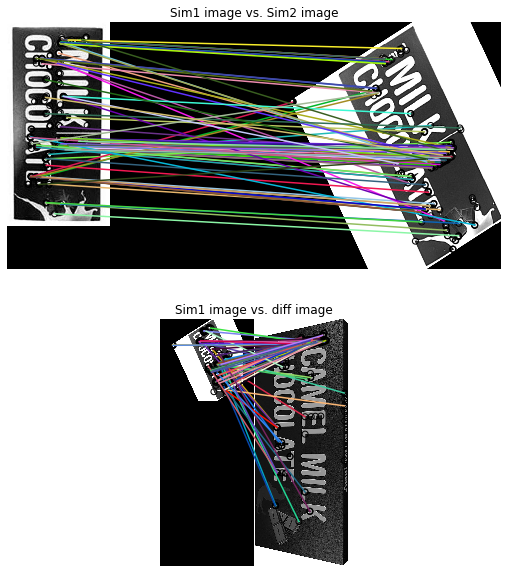

In [88]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,10))
plt.gray()

plot_matches(ax[0], img_sim1, img_sim2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Sim1 image vs. Sim2 image")

plot_matches(ax[1], img_sim2, img_diff, keypoints2, keypoints3, matches23)
ax[1].axis('off')
ax[1].set_title("Sim1 image vs. diff image")
plt.show()


In [45]:
#censure 

In [107]:
from skimage import data
from skimage import transform as tf
from skimage.feature import CENSURE
from skimage.color import rgb2gray

import matplotlib.pyplot as plt



In [144]:
import skimage.io, skimage
img_sim1=skimage.io.imread('/home/diganta/Downloads/21-40/27/Sim1.jpg',as_grey = True)
img_sim2=skimage.io.imread('/home/diganta/Downloads/21-40/27/Sim2.jpg',as_grey = True) #Test Image
img_diff=skimage.io.imread('/home/diganta/Downloads/21-40/27/Diff.jpg',as_grey = True)

In [145]:
detector = CENSURE()
detector.detect(img_sim1)
keypoints1=detector.keypoints
len(keypoints1)

207

In [146]:
detector.detect(img_sim2)
keypoints2=detector.keypoints
len(keypoints2)

167

In [147]:
detector.detect(img_diff)
keypoints3=detector.keypoints
len(keypoints3)

306

In [148]:
total_keypoints12=len(keypoints1)+len(keypoints2)
total_keypoints12


374

In [149]:
total_keypoints23=len(keypoints2)+len(keypoints3)
total_keypoints23

473

In [150]:
matches12 = match_descriptors(keypoints1, keypoints2, cross_check=True)
matches23 = match_descriptors(keypoints2, keypoints3, cross_check=True)

In [151]:
print(len(matches12))
print(len(matches23))

140
19


In [153]:
accuracy=len(matches12)/total_keypoints12
print(accuracy)

0.37433155080213903


In [154]:
accuracy=len(matches23)/total_keypoints23
print(accuracy)

0.040169133192389


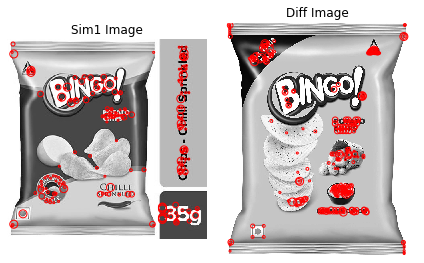

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))

detector.detect(img_sim1)

ax[0].imshow(img_sim1, cmap=plt.cm.gray)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Sim1 Image")

detector.detect(img_diff)

ax[1].imshow(img_diff, cmap=plt.cm.gray)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Diff Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

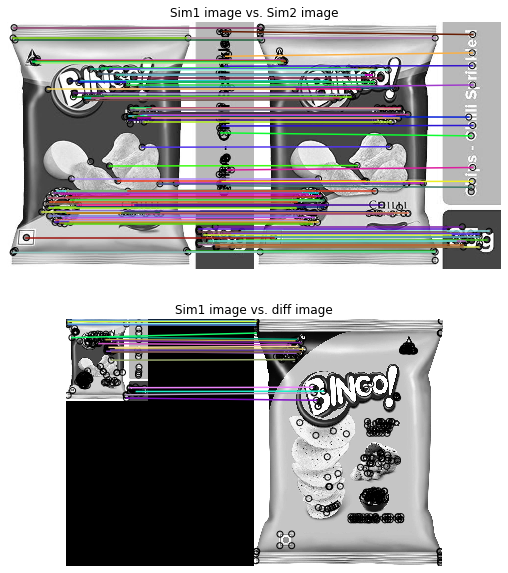

In [158]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,10))
plt.gray()

plot_matches(ax[0], img_sim1, img_sim2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Sim1 image vs. Sim2 image")

plot_matches(ax[1], img_sim2, img_diff, keypoints2, keypoints3, matches23)
ax[1].axis('off')
ax[1].set_title("Sim1 image vs. diff image")
plt.show()


In [ ]:
#using rANSAC 

In [5]:
import skimage
import skimage.io 
import numpy as np 

def load_image(filepath, to_float = False , greyscale = True):
	img = skimage.io.imread(filepath, as_grey = greyscale)
	if to_float:
		img = skimage.img_as_float(img)
	return img

In [6]:
from skimage.feature import CENSURE
	
def get_keypoints(img):
	detector = CENSURE()
	detector.detect(img)
	kps = detector.keypoints
	return kps
	

In [7]:
from skimage.feature import BRIEF,  haar_like_feature as hlf
from skimage.transform import integral
offset = 10
def get_kp_features_haar(img,kps):
	imgx,imgy = img.shape
	int_img = integral.integral_image(img)
	finkpreprs = []
	for kp in kps:
		x = kp[0]
		y = kp[1]
		if x - offset > 0 and y - offset > 0 and x + offset < imgx and y + offset < imgy :
			feature = hlf(int_img,x-offset,y-offset,offset,offset)
			finkpreprs.append((kp,feature))
	return finkpreprs


In [8]:
def get_kp_features_brief(img,kps):
	extractor = BRIEF()
	extractor.extract(img,kps)
	descriptors = extractor.descriptors
	newkps = kps[extractor.mask]
	return descriptors,newkps

In [9]:
from skimage.transform import resize
def make_same_size(img1,img2):
	img1x,img1y = img1.shape
	img2x,img2y = img2.shape
	if img1x * img1y >= img2x * img2y :
		img2 = resize(img2,(img1x,img1y))
		img2 = skimage.img_as_ubyte(img2)
	else:
		img1 = resize(img1,(img2x,img2y))
		img1 = skimage.img_as_ubyte(img1)
	return img1,img2

In [10]:
from skimage.feature import match_descriptors
from skimage.measure import ransac
from skimage.transform import AffineTransform
def compare_images(img1,img2):
	img1,img2 = make_same_size(img1,img2)
	## Making same size as BRIEF features not scale invariant
	kps1 = get_keypoints(img1)
	kps2 = get_keypoints(img2)
	descriptors1,kps1 = get_kp_features_brief(img1,kps1)
	descriptors2,kps2 = get_kp_features_brief(img2,kps2)
	assert len(kps1) == len(descriptors1)
	assert len(kps2) == len(descriptors2)
	kpreprs1 = [(kp,descriptor) for kp,descriptor in zip(kps1,descriptors1)]
	kpreprs2 = [(kp,descriptor) for kp,descriptor in zip(kps2,descriptors2)]
	matched_points = match_descriptors(descriptors1,descriptors2)
	print(matched_points) # This is matched points without applying RANSAC
	# getting coordinates of points matched by Brute Force
	coords1 = np.array([kpreprs1[x[0]][0] for x in matched_points])
	coords2 = np.array([kpreprs2[x[1]][0] for x in matched_points])
	#print(coords1,coords2, len(coords1), len(coords2))
	model_robust, inliers = ransac((coords1, coords2), AffineTransform, min_samples=3,residual_threshold=2, max_trials=100)
	outliers = inliers == False
	print(model_robust.params,inliers) # Tells which points actually follow a geomteric distribution
	return coords1, coords2, inliers, outliers,kps1,kps2



In [19]:
if __name__ == "__main__":

    x1 = load_image("/home/diganta/Downloads/21-40/27/Sim1.jpg")
    x2 = load_image("/home/diganta/Downloads/21-40/27/Sim2.jpg")
    x3=  load_image("/home/diganta/Downloads/21-40/27/Diff.jpg")
    src, dst, inliers, outliers,kps1,kps2=compare_images(x1, x2)
    
    
    

[[  0   1]
 [ 13   4]
 [ 14   5]
 [ 15   6]
 [ 16   7]
 [ 17   8]
 [ 20  10]
 [ 21  11]
 [ 23  12]
 [ 24  13]
 [ 25  14]
 [ 29  16]
 [ 30  17]
 [ 31  18]
 [ 32  19]
 [ 33  20]
 [ 34  21]
 [ 35  22]
 [ 36  23]
 [ 37  24]
 [ 38  25]
 [ 39  26]
 [ 40  28]
 [ 41  30]
 [ 46  32]
 [ 47  33]
 [ 48  34]
 [ 49  37]
 [ 50  38]
 [ 53  39]
 [ 54  40]
 [ 55  41]
 [ 56  43]
 [ 57  44]
 [ 58  45]
 [ 61  46]
 [ 62  47]
 [ 63  49]
 [ 65  50]
 [ 66  52]
 [ 67  53]
 [ 68  54]
 [ 69  55]
 [ 70  56]
 [ 71  57]
 [ 72  59]
 [ 73  60]
 [ 74  58]
 [ 75  61]
 [ 76  62]
 [ 77  63]
 [ 78  64]
 [ 79  65]
 [ 82  66]
 [ 86  67]
 [ 87  69]
 [ 88  70]
 [ 92  71]
 [ 93  72]
 [102  75]
 [111  76]
 [118  78]
 [120  79]
 [122  82]
 [123  83]
 [130  86]
 [131  87]
 [132  88]
 [133  89]
 [134  91]
 [135  92]
 [136  93]
 [137  94]
 [138  95]
 [139  96]
 [140  97]
 [141  98]
 [142  99]
 [143 100]
 [144 101]
 [145 102]
 [146 103]
 [147 106]
 [148 107]
 [149 108]
 [150 109]
 [151 113]
 [152 114]
 [153 115]
 [154 116]
 [155 117]

In [16]:
src, dst, inliers1, outliers1,kps1,kps3 = compare_images(x1, x3)

[[  1 151]
 [  3 238]
 [  7  65]
 [ 10  14]
 [ 11  91]
 [ 12  18]
 [ 13  22]
 [ 14  24]
 [ 15 122]
 [ 17 175]
 [ 18  44]
 [ 19  36]
 [ 20  34]
 [ 21  47]
 [ 25  73]
 [ 28  69]
 [ 31  77]
 [ 32  78]
 [ 36 102]
 [ 38 231]
 [ 40 148]
 [ 41 128]
 [ 50 129]
 [ 59  63]
 [ 64  74]
 [ 67  97]
 [ 70 227]
 [ 73 178]
 [ 75  90]
 [ 83 229]
 [ 91 159]
 [ 94 140]
 [ 98  55]
 [102 219]
 [104 220]
 [105  28]
 [109 189]
 [120 112]
 [122 239]
 [124 211]
 [125  75]
 [134 104]
 [136 255]
 [137 264]
 [140 233]
 [143 240]
 [148  93]
 [150 261]
 [151 164]
 [152 163]
 [157   0]
 [159  57]
 [165 278]
 [168   2]
 [172 246]
 [173 279]
 [174 280]
 [176 145]]
[[ 8.78206356e-01  5.20774684e-01 -1.13522150e+02]
 [-1.94923873e-01 -4.03923534e-01  1.07264174e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] [False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False 

In [31]:
print(len(kps1))
print(len(kps2))
print(len(kps3))


198
159
281


In [32]:
total_keypoints12=len(kps1)+len(kps2)
total_keypoints12

357

In [33]:
total_keypoints23=len(kps2)+len(kps3)
total_keypoints23

440

In [65]:
x3.shape

(1500, 1142)

In [66]:
inliers


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [67]:
sum(inliers==True) #Total no.of correct matches between sim and sim2 images

120

In [68]:
sum(inliers1==True) #Total no.of correct matches between sim and diff images

3

In [69]:
sum(outliers==True) ##Total no.of incorrect matches between sim and sim2 images

2

In [70]:
sum(outliers1==True)  #Total no.of incorrect matches between sim and diff images

55

# accuracy in Ransac between sim1 and sim2 images

In [71]:
accuracy=sum(inliers==True)/total_keypoints12
accuracy

0.33613445378151263

# accuracy in Ransac between sim1 and diff images

In [72]:
accuracy=sum(inliers1==True)/total_keypoints23
accuracy

0.006818181818181818

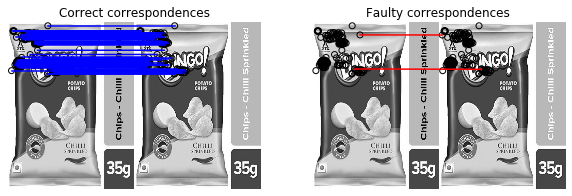

In [73]:
import matplotlib.pyplot as plt
from skimage.feature import (match_descriptors,plot_matches)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

plt.gray()

inlier_idxs = np.nonzero(inliers)[0]
plot_matches(ax[0], x1, x2, src, dst,
             np.column_stack((inlier_idxs, inlier_idxs)), matches_color='b')
ax[0].axis('off')
ax[0].set_title('Correct correspondences')

outlier_idxs = np.nonzero(outliers)[0]
plot_matches(ax[1], x1, x2, src, dst,
             np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')
ax[1].axis('off')
ax[1].set_title('Faulty correspondences')

plt.show()

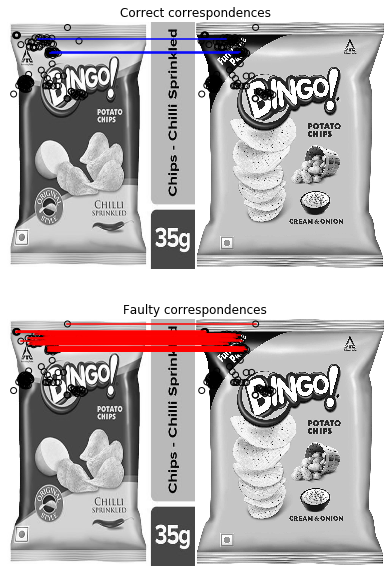

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

plt.gray()

inlier_idxs = np.nonzero(inliers1)[0]
plot_matches(ax[0], x1, x3, src, dst,
             np.column_stack((inlier_idxs, inlier_idxs)), matches_color='b')
ax[0].axis('off')
ax[0].set_title('Correct correspondences')


outlier_idxs = np.nonzero(outliers1)[0]
plot_matches(ax[1], x1, x3, src, dst,
             np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')
ax[1].axis('off')
ax[1].set_title('Faulty correspondences')

plt.show()
